In [1]:
#importing libraries
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [2]:
#installing yahoo finance to collect data
!pip install yfinance

In [3]:
#downloading nvidia data
nvda = yf.Ticker("NVDA")

In [4]:
nvda = nvda.history(period="max")

In [5]:
nvda

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-02 00:00:00-04:00,121.129997,123.410004,121.029999,122.669998,218374000,0.0,0.0
2024-07-03 00:00:00-04:00,121.660004,128.279999,121.360001,128.279999,215749000,0.0,0.0
2024-07-05 00:00:00-04:00,127.379997,128.850006,125.680000,125.830002,214176700,0.0,0.0


In [6]:
nvda.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [7]:
#deleting columns that are not necessary
del nvda['Dividends']
del nvda['Stock Splits']

In [8]:
nvda.shape

(6406, 5)

In [9]:
#checking data info
nvda.info

<bound method DataFrame.info of                                  Open        High         Low       Close  \
Date                                                                        
1999-01-22 00:00:00-05:00    0.040129    0.044786    0.035590    0.037621   
1999-01-25 00:00:00-05:00    0.040607    0.042039    0.037621    0.041562   
1999-01-26 00:00:00-05:00    0.042039    0.042876    0.037740    0.038337   
1999-01-27 00:00:00-05:00    0.038457    0.039412    0.036307    0.038218   
1999-01-28 00:00:00-05:00    0.038218    0.038457    0.037859    0.038098   
...                               ...         ...         ...         ...   
2024-07-02 00:00:00-04:00  121.129997  123.410004  121.029999  122.669998   
2024-07-03 00:00:00-04:00  121.660004  128.279999  121.360001  128.279999   
2024-07-05 00:00:00-04:00  127.379997  128.850006  125.680000  125.830002   
2024-07-08 00:00:00-04:00  127.489998  130.770004  127.040001  128.199997   
2024-07-09 00:00:00-04:00  130.350006  133.8

In [10]:
#checking data statistics
nvda.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6406.0,5.909173e+00,1.514165e+01,3.200754e-02,2.541292e-01,4.254878e-01,4.112181e+00,1.398000e+02
High,6406.0,6.018077e+00,1.542365e+01,3.260467e-02,2.622697e-01,4.332192e-01,4.162227e+00,1.407600e+02
Low,6406.0,5.796175e+00,1.484457e+01,3.057392e-02,2.465048e-01,4.185402e-01,4.047564e+00,1.306900e+02
Close,6406.0,5.914135e+00,1.515873e+01,3.129119e-02,2.533269e-01,4.259373e-01,4.098305e+00,1.355800e+02
Volume,6406.0,6.067996e+08,4.325752e+08,1.968000e+07,3.468320e+08,5.081140e+08,7.370740e+08,9.230856e+09


In [11]:
nvda.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [12]:
#checking missing data and cleaning
nvda.isnull()

,Open,High,Low,Close,Volume
Date,,,,,
1999-01-22 00:00:00-05:00,False,False,False,False,False
1999-01-25 00:00:00-05:00,False,False,False,False,False
1999-01-26 00:00:00-05:00,False,False,False,False,False
1999-01-27 00:00:00-05:00,False,False,False,False,False
1999-01-28 00:00:00-05:00,False,False,False,False,False
...,...,...,...,...,...
2024-07-02 00:00:00-04:00,False,False,False,False,False
2024-07-03 00:00:00-04:00,False,False,False,False,False
2024-07-05 00:00:00-04:00,False,False,False,False,False


In [13]:
nvda.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [14]:
#checking duplicate data and cleaning
nvda.duplicated().sum()

0

In [15]:
nvda

,Open,High,Low,Close,Volume
Date,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000
...,...,...,...,...,...
2024-07-02 00:00:00-04:00,121.129997,123.410004,121.029999,122.669998,218374000
2024-07-03 00:00:00-04:00,121.660004,128.279999,121.360001,128.279999,215749000
2024-07-05 00:00:00-04:00,127.379997,128.850006,125.680000,125.830002,214176700


In [16]:
nvda.index

DatetimeIndex(['1999-01-22 00:00:00-05:00', '1999-01-25 00:00:00-05:00',
               '1999-01-26 00:00:00-05:00', '1999-01-27 00:00:00-05:00',
               '1999-01-28 00:00:00-05:00', '1999-01-29 00:00:00-05:00',
               '1999-02-01 00:00:00-05:00', '1999-02-02 00:00:00-05:00',
               '1999-02-03 00:00:00-05:00', '1999-02-04 00:00:00-05:00',
               ...
               '2024-06-25 00:00:00-04:00', '2024-06-26 00:00:00-04:00',
               '2024-06-27 00:00:00-04:00', '2024-06-28 00:00:00-04:00',
               '2024-07-01 00:00:00-04:00', '2024-07-02 00:00:00-04:00',
               '2024-07-03 00:00:00-04:00', '2024-07-05 00:00:00-04:00',
               '2024-07-08 00:00:00-04:00', '2024-07-09 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=6406, freq=None)

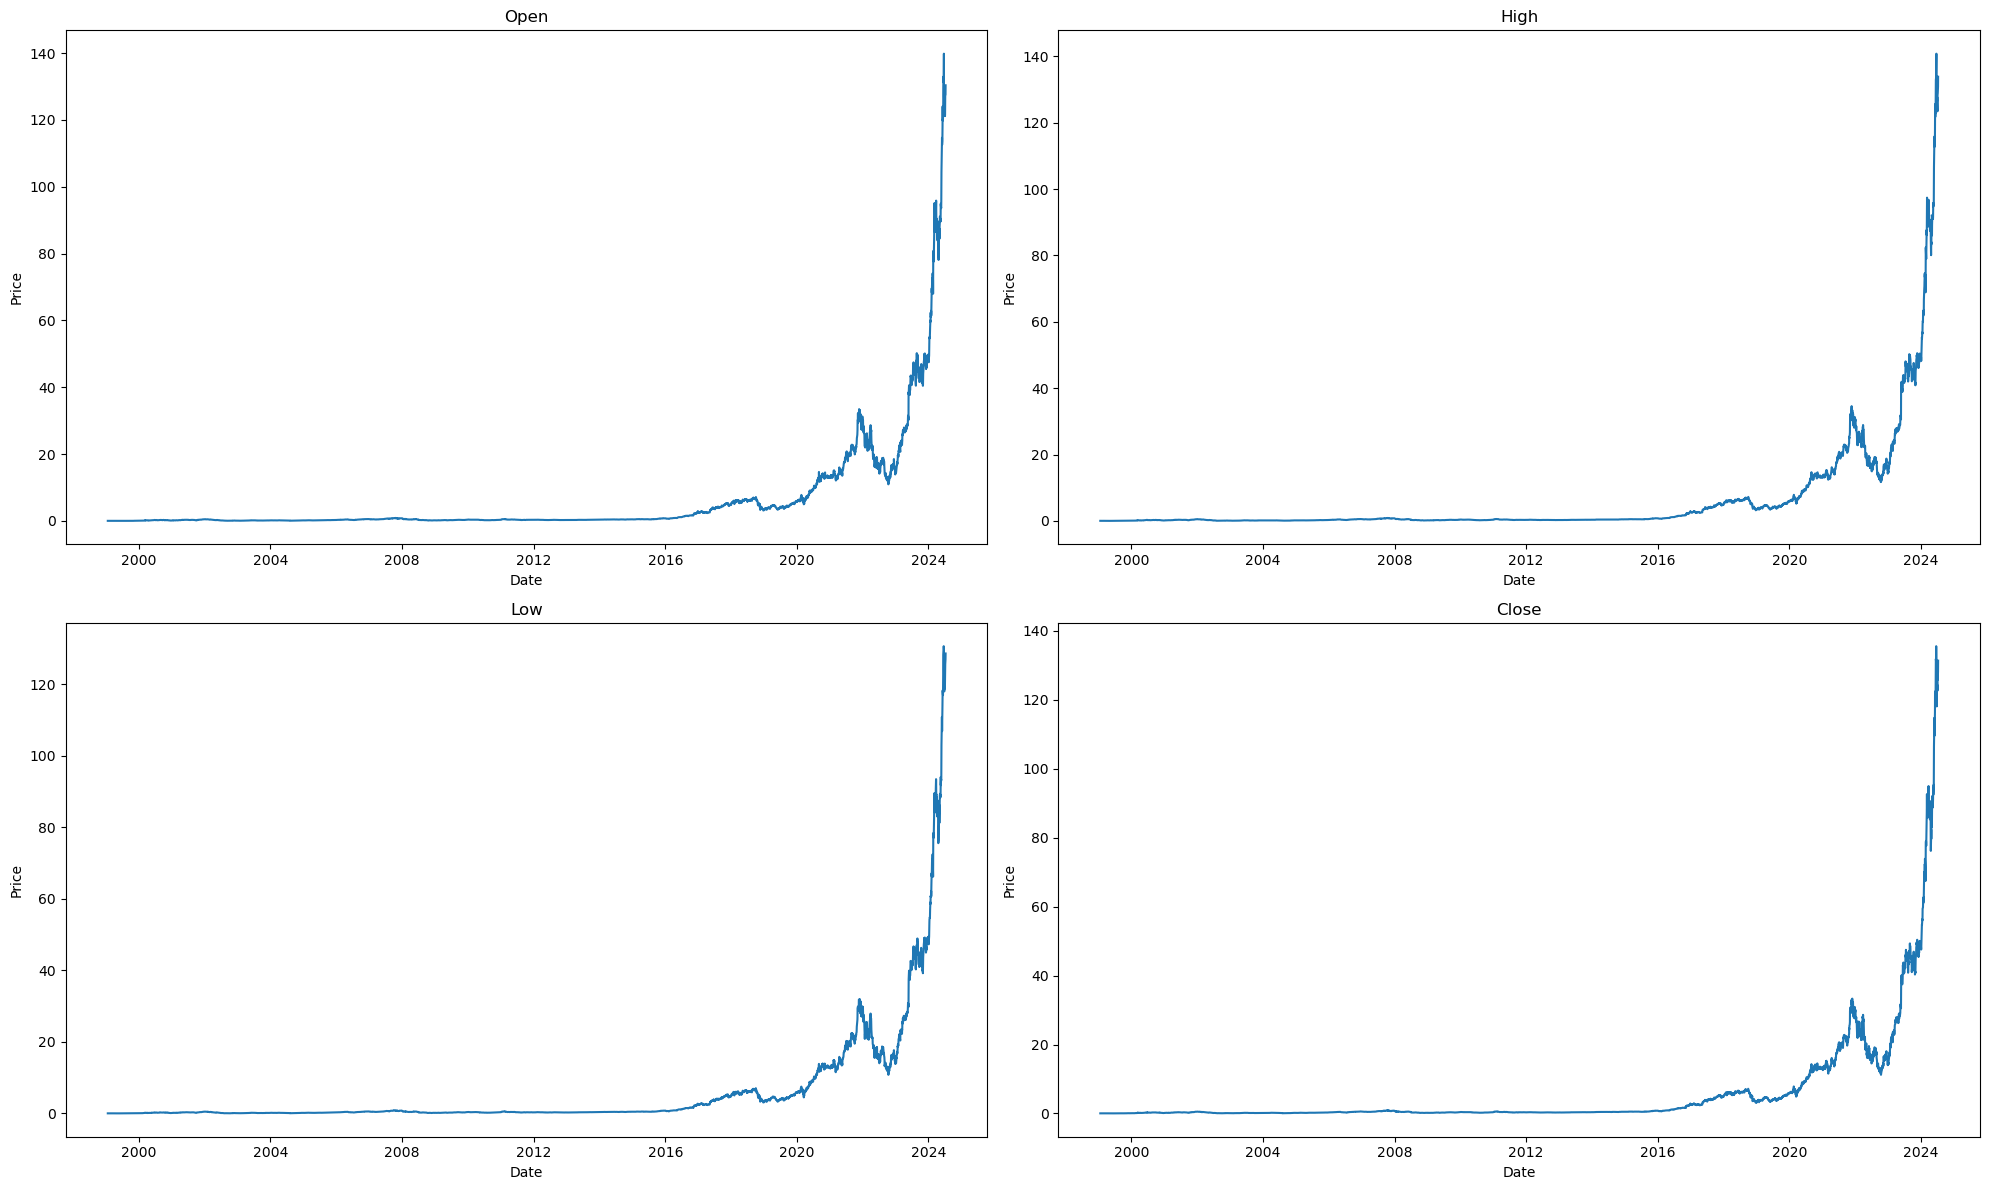

In [17]:
#analysing change in price of the stock by visualization
plt.figure(figsize=(20,12))
for i, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, i)
    plt.plot(nvda.index, nvda[col])
    plt.title(col)
    plt.xlabel('Date')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

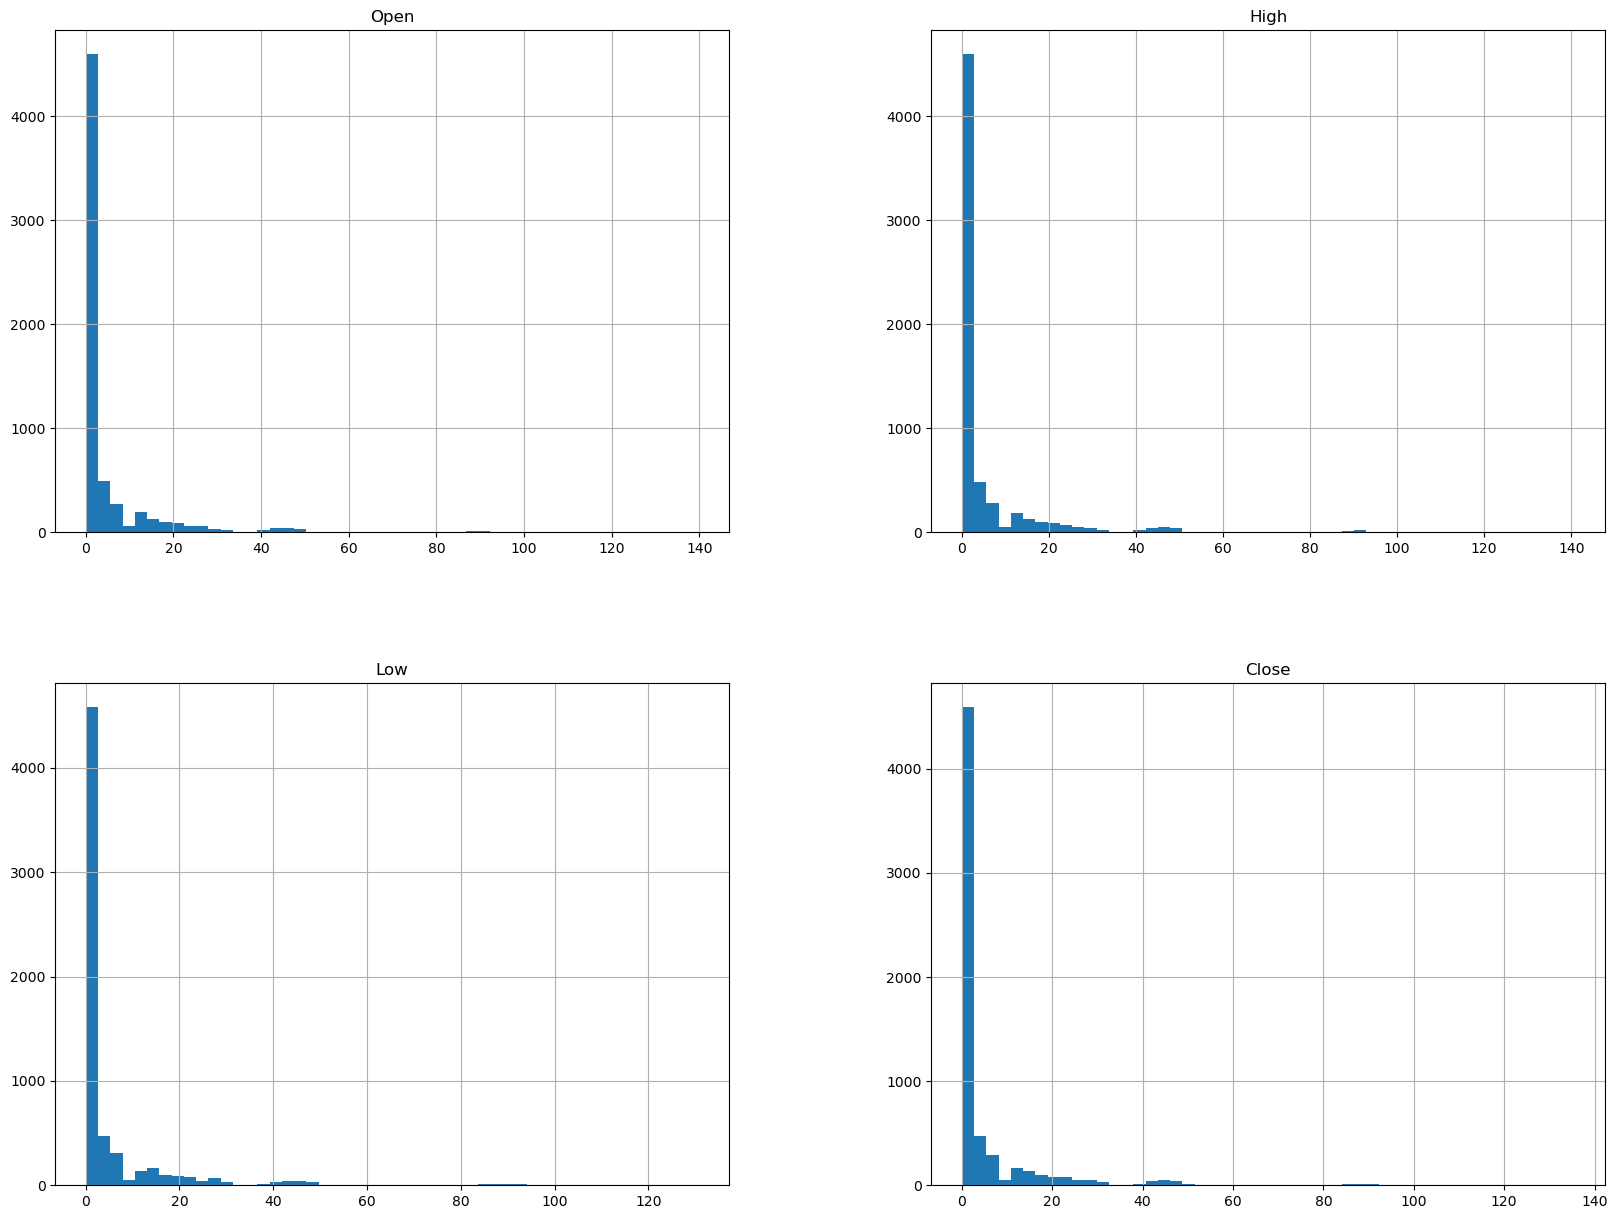

In [18]:
#histogram for distribution of data
#x-axis is price value and Y-axis is frequence of it
plt.figure(figsize=(14, 7))
nvda[['Open', 'High', 'Low', 'Close']].hist(bins=50, figsize=(20, 15))
plt.show()

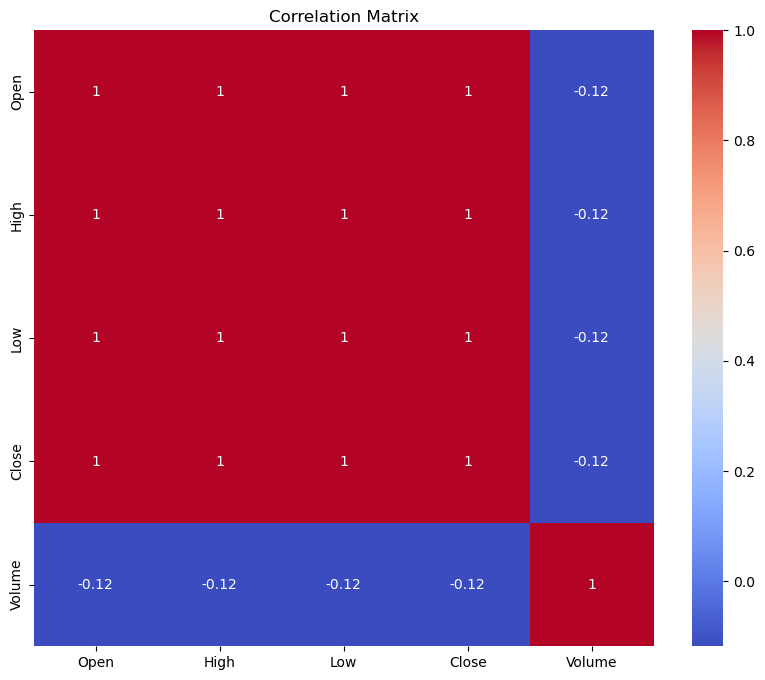

In [19]:
#correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(nvda[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1400x700 with 0 Axes>

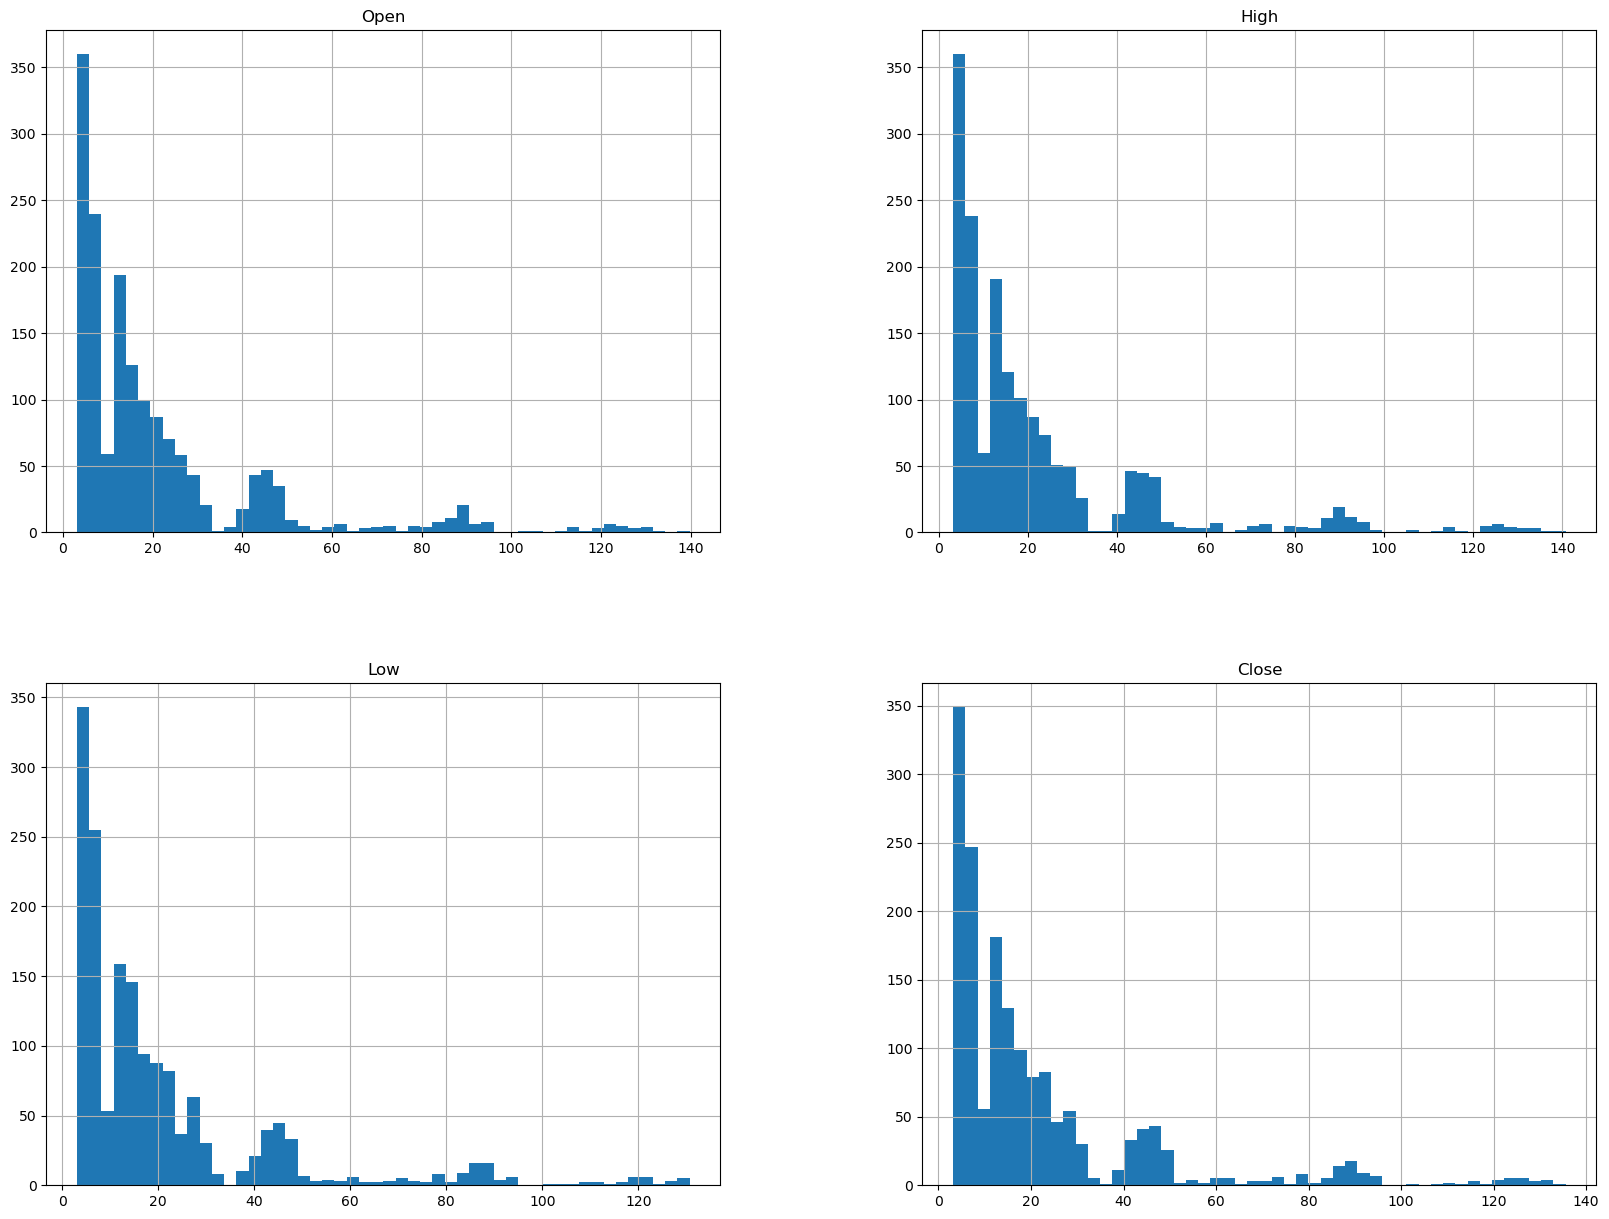

In [20]:
#5 recent years data to see how different between full data and recent years data
recent_nvda = nvda[nvda.index >= '2018-01-01']

plt.figure(figsize=(14, 7))
recent_nvda[['Open', 'High', 'Low', 'Close']].hist(bins=50, figsize=(20, 15))
plt.show()

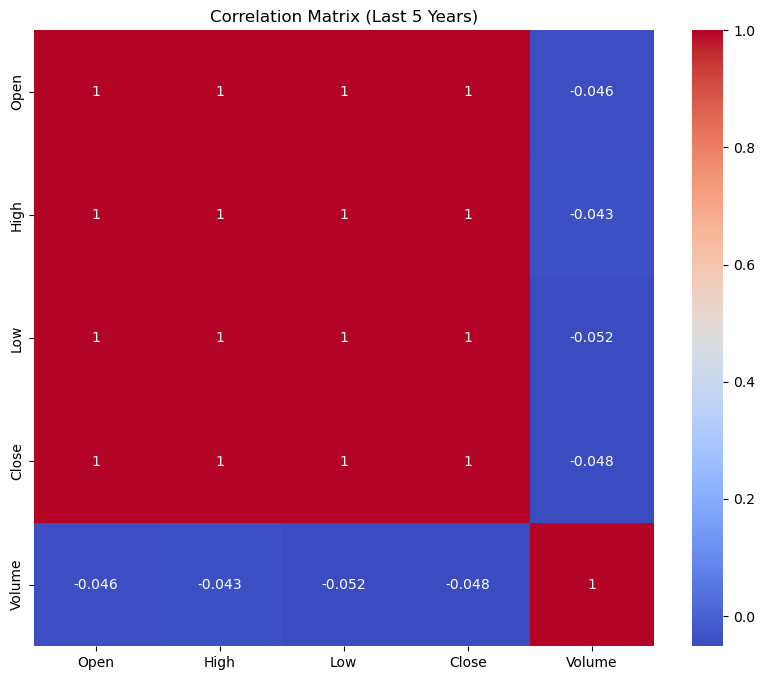

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(recent_nvda[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Last 5 Years)')
plt.show()

In [22]:
nvda.shape

(6406, 5)

In [23]:
#to see detail stock's price value in change
sample = nvda[5500:6404]

In [24]:
!pip install chart_studio
!pip install plotly


In [25]:
init_notebook_mode(connected=True)

In [26]:
#analysing value of stock
trace = go.Candlestick(x= sample.index, 
               high = sample['High'], 
               open = sample['Open'], 
               close = sample['Close'],
               low = sample['Low'])

In [27]:
candle_data = [trace]

layout = {
    'title': 'Nvida Historical Price',
    'xaxis':{'title':'Data'}
}

In [28]:
fig = go.Figure(data = candle_data, layout=layout)
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

<Axes: xlabel='Date'>

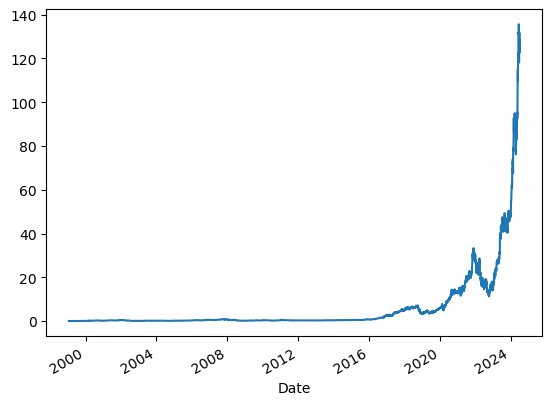

In [29]:
#analysing close price
nvda["Close"].plot()

<Axes: xlabel='Date'>

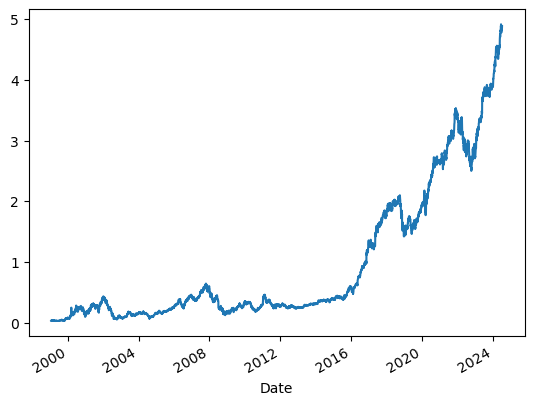

In [30]:
#analysing close price by log-scale to see the detail of change.
np.log1p(nvda['Close']).plot()

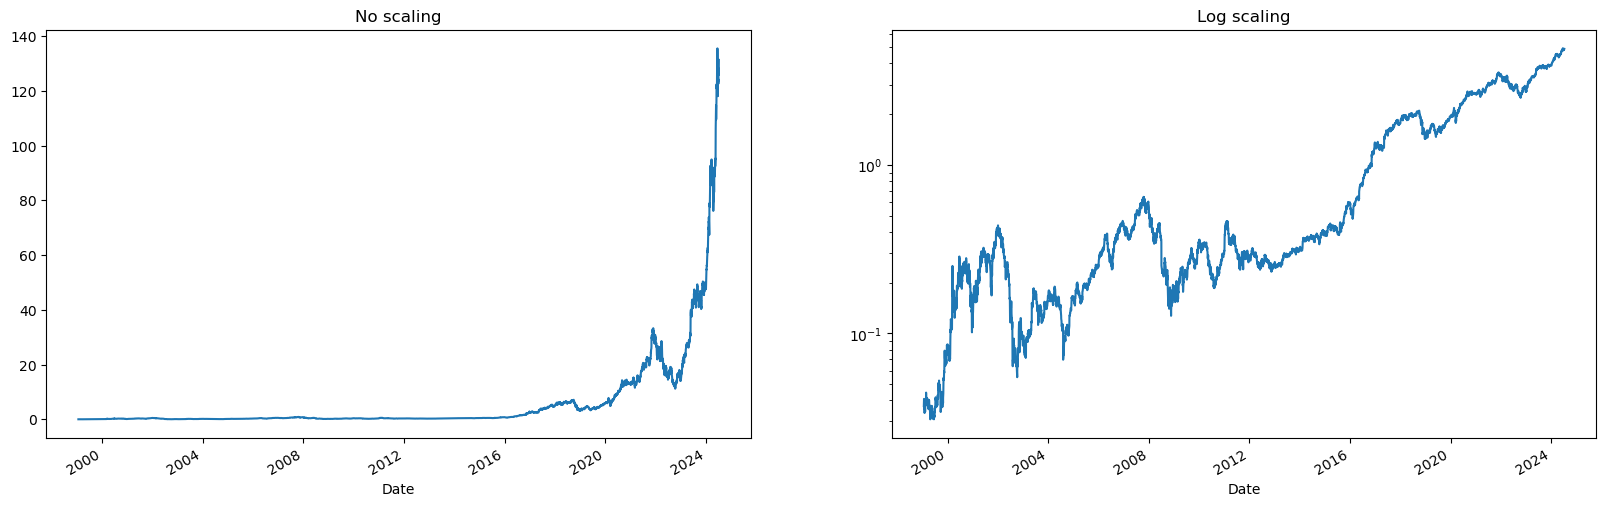

In [31]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
nvda['Close'].plot()
plt.title('No scaling')

plt.subplot(1,2,2)
np.log1p(nvda['Close']).plot()
plt.title('Log scaling')
plt.yscale('log')

In [32]:
#analysing closing price yearly
nvda['Close'].resample('Y').mean()

Date
1999-12-31 00:00:00-05:00     0.044651
2000-12-31 00:00:00-05:00     0.201304
2001-12-31 00:00:00-05:00     0.302262
2002-12-31 00:00:00-05:00     0.220473
2003-12-31 00:00:00-05:00     0.135299
2004-12-31 00:00:00-05:00     0.148268
2005-12-31 00:00:00-05:00     0.218158
2006-12-31 00:00:00-05:00     0.414953
2007-12-31 00:00:00-05:00     0.635742
2008-12-31 00:00:00-05:00     0.365644
2009-12-31 00:00:00-05:00     0.271748
2010-12-31 00:00:00-05:00     0.311013
2011-12-31 00:00:00-05:00     0.387243
2012-12-31 00:00:00-05:00     0.309947
2013-12-31 00:00:00-05:00     0.331212
2014-12-31 00:00:00-05:00     0.441419
2015-12-31 00:00:00-05:00     0.574455
2016-12-31 00:00:00-05:00     1.320566
2017-12-31 00:00:00-05:00     3.699203
2018-12-31 00:00:00-05:00     5.754205
2019-12-31 00:00:00-05:00     4.339251
2020-12-31 00:00:00-05:00     9.861082
2021-12-31 00:00:00-05:00    19.486444
2022-12-31 00:00:00-05:00    18.547049
2023-12-31 00:00:00-05:00    36.558143
2024-12-31 00:00:00-

<Axes: xlabel='Date'>

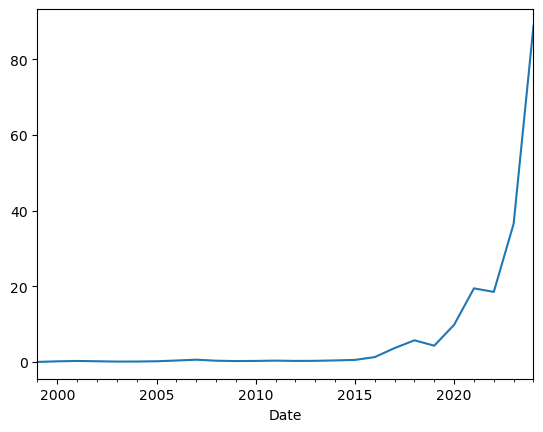

In [33]:
nvda['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

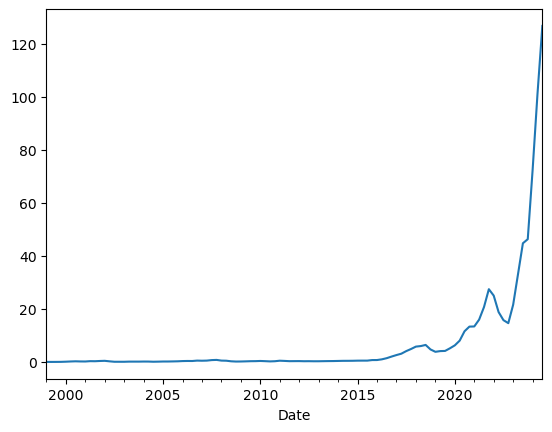

In [34]:
##analysing closing price quarterly
nvda['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

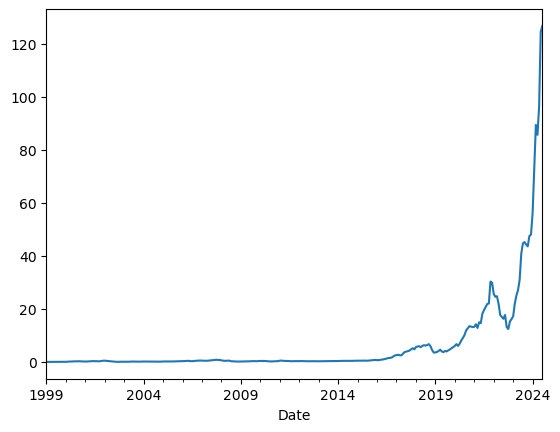

In [35]:
#analysing closing price monthly
nvda['Close'].resample('M').mean().plot()

In [36]:
#analysing daily change in closing price
nvda['Close_price_pct_change'] = nvda['Close'].pct_change()*100

In [37]:
nvda['Close_price_pct_change']

Date
1999-01-22 00:00:00-05:00          NaN
1999-01-25 00:00:00-05:00    10.476388
1999-01-26 00:00:00-05:00    -7.759352
1999-01-27 00:00:00-05:00    -0.311055
1999-01-28 00:00:00-05:00    -0.314394
                               ...    
2024-07-02 00:00:00-04:00    -1.311347
2024-07-03 00:00:00-04:00     4.573246
2024-07-05 00:00:00-04:00    -1.909882
2024-07-08 00:00:00-04:00     1.883490
2024-07-09 00:00:00-04:00     2.480505
Name: Close_price_pct_change, Length: 6406, dtype: float64

<Axes: xlabel='Date'>

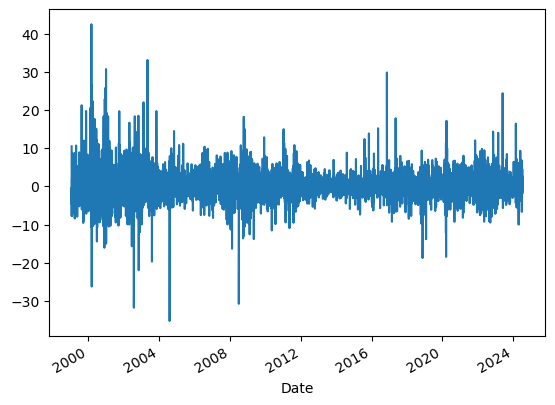

In [38]:
nvda['Close_price_pct_change'].plot()

In [39]:
#analysing recent daily change in closing price
sample['Close_price_pct_change'] = sample['Close'].pct_change()*100

/var/folders/rd/29j6g2p901zbf4yr47tbvdgh0000gn/T/ipykernel_81749/286177294.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Date'>

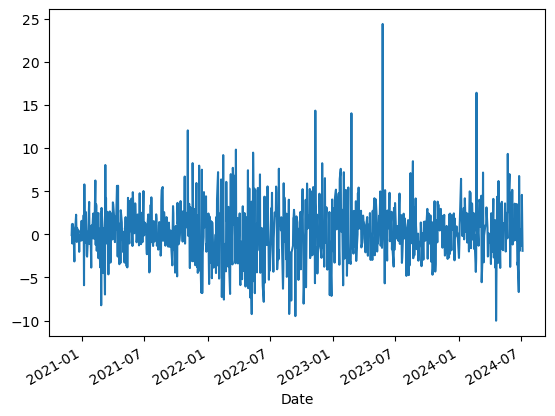

In [40]:
sample['Close_price_pct_change'].plot()

In [41]:
#predicting with random forest
X = nvda[['Open', 'High', 'Low', 'Volume']]
y = nvda['Close']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [44]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
#model prediction
y_pred = model.predict(X_test)

In [46]:
#model performance evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.07604994886794281


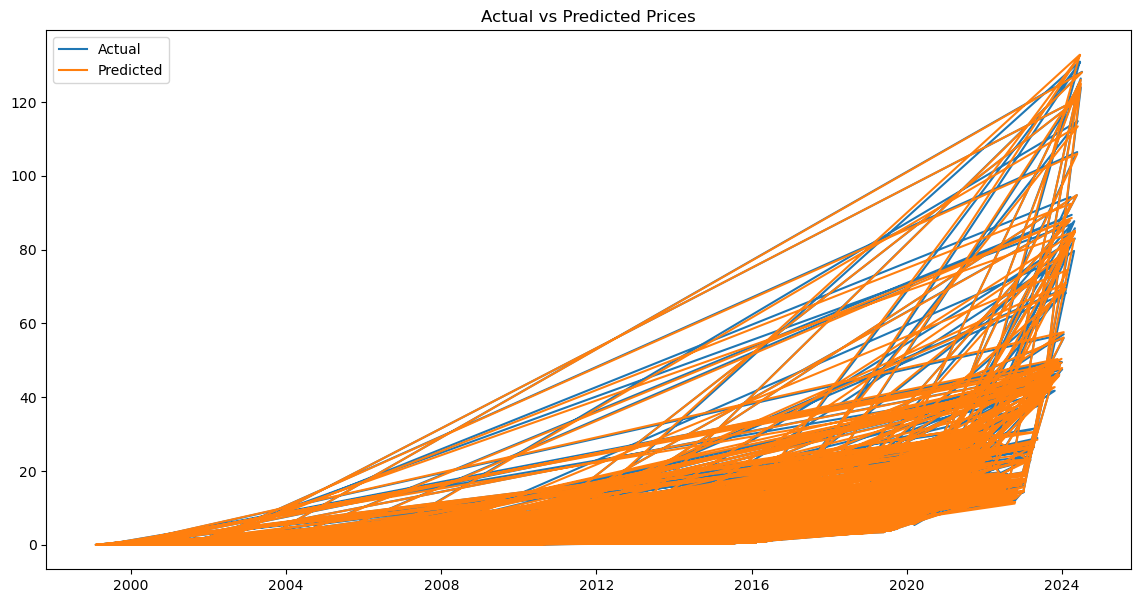

In [47]:
#visualizing prediction 
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [48]:
#future prediction
future_periods = 30  # Number of days to predict in the future
future_dates = pd.date_range(start=nvda.index[-1], periods=future_periods + 1)[1:]

In [49]:
#creating a blank dataframe for future data
future_df = pd.DataFrame(index=future_dates, columns=X.columns)
last_known = nvda.iloc[-1][['Open', 'High', 'Low', 'Volume']]

In [50]:
for col in future_df.columns:
    future_df[col] = last_known[col]

In [51]:
#predicting future prices
future_preds = model.predict(future_df)

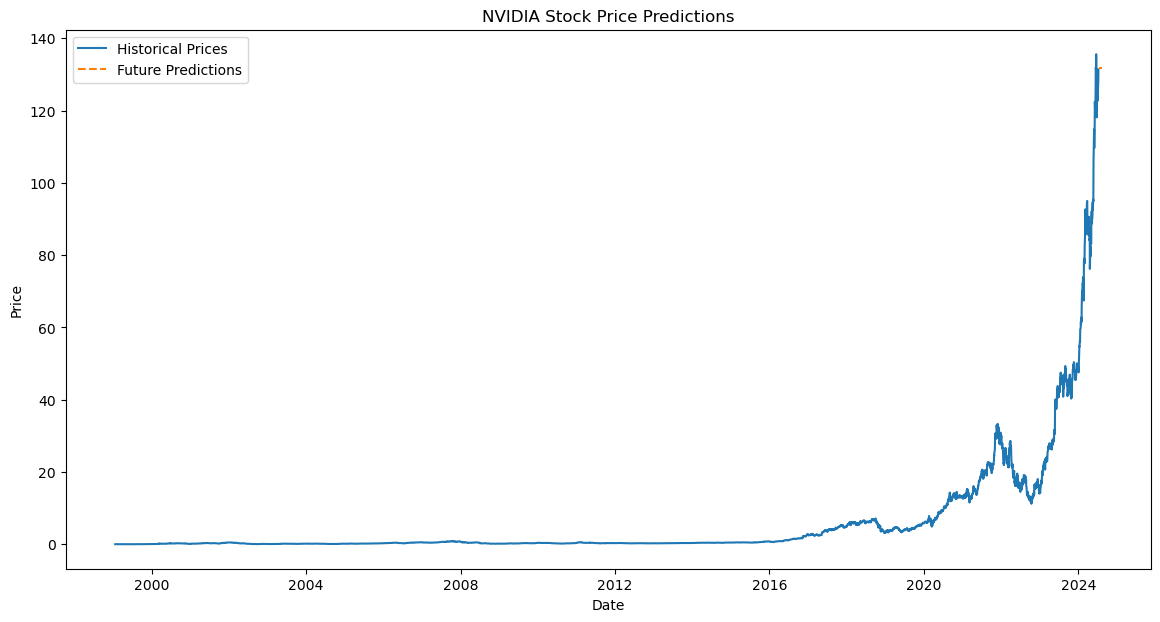

In [52]:
#visualizing the entire dataset with future predictions
plt.figure(figsize=(14, 7))
plt.plot(nvda.index, nvda['Close'], label='Historical Prices')
plt.plot(future_dates, future_preds, label='Future Predictions', linestyle='--')
plt.title('NVIDIA Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

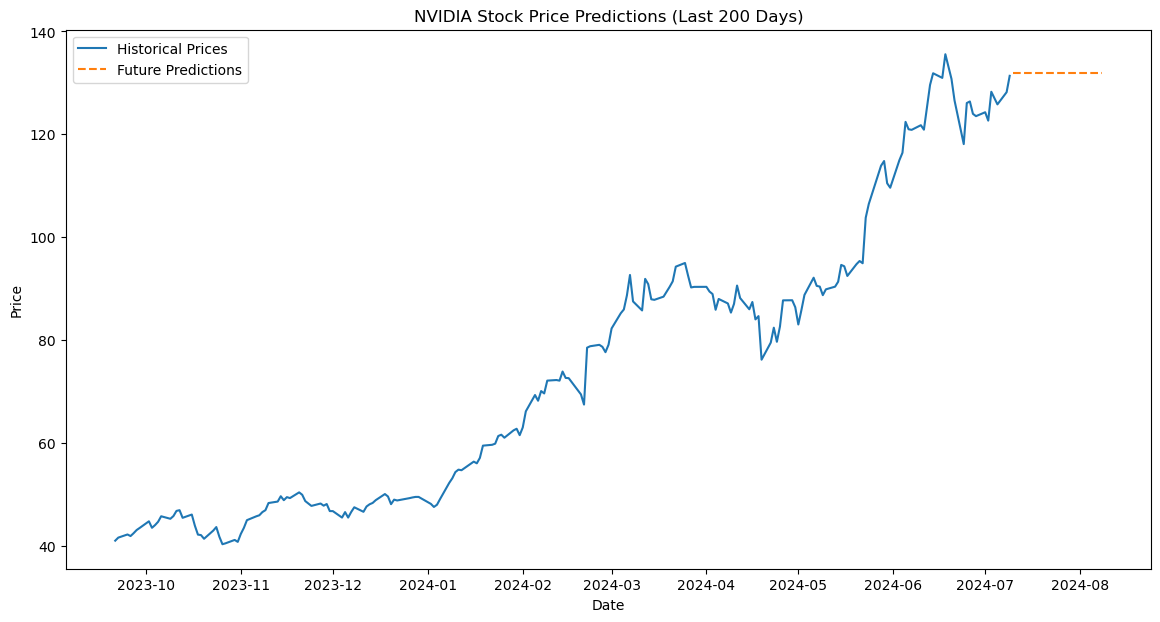

In [53]:
#adding an expanded graph - Recent data with future predictions
plt.figure(figsize=(14, 7))
plt.plot(nvda.index[-200:], nvda['Close'][-200:], label='Historical Prices')
plt.plot(future_dates, future_preds, label='Future Predictions', linestyle='--')
plt.title('NVIDIA Stock Price Predictions (Last 200 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()